# ACP Températures

## Les données

On dispose de températures mensuelles moyennes pour 15 villes françaises. On dispose aussi de leur position en latitude et longitude.

## Les bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style("white")

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


# pour avoir les graphiques dans le notebook
%matplotlib inline 

## Lecture des données

In [2]:
temp = pd.read_csv("data_temp.csv", sep=";", header=0)
temp.head(15)

,Ville,Janv,Fev,Mars,Avri,Mai,Juin,Juil,Aout,Sept,Octo,Nove,Dece,Lati,Long
0,Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34
1,Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29
2,Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05
3,Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43
4,Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04
5,Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51
6,Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24
7,Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53
8,Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33
9,Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.5,43.42,7.15


Ajout de 2 colonnes `moy` et `amp` respectivement égales à la moyenne annuelles des température et à l’amplitude annuelle de chaque ville.

In [3]:
temp['moy']=temp[temp.columns[1:13]].mean(axis=1) # axis=1 pour travailler sur les lignes
temp['amp']=temp[temp.columns[1:13]].max(axis=1)-temp[temp.columns[1:13]].min(axis=1)
temp


,Ville,Janv,Fev,Mars,Avri,Mai,Juin,Juil,Aout,Sept,Octo,Nove,Dece,Lati,Long,moy,amp
0,Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.333333,15.4
1,Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.766667,10.2
2,Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.941667,16.8
3,Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.983333,18.6
4,Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.733333,14.7
5,Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.358333,18.6
6,Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.233333,17.8
7,Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.891667,17.1
8,Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.691667,13.8
9,Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.5,43.42,7.15,14.866667,15.2


# Résumé et visualisation des donnees

Affichage d'un résumé statistique des toutes les variables sauf la longitude et la latitude

In [4]:
tempn=temp[temp.columns[1:13]]
tempn.describe().round(3)

,Janv,Fev,Mars,Avri,Mai,Juin,Juil,Aout,Sept,Octo,Nove,Dece
count,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.00,15.000,15.000
mean,3.973,4.833,8.233,10.980,14.433,17.833,19.833,19.567,16.987,12.32,7.927,4.867
std,2.007,1.868,1.529,1.415,1.505,1.794,2.129,2.012,1.848,1.83,1.804,1.996
min,0.400,1.500,5.600,8.900,11.600,14.400,15.600,16.000,14.700,9.50,4.900,1.300
25%,2.400,3.350,7.550,10.000,13.700,17.150,18.900,18.450,15.850,11.30,6.600,3.450
50%,4.700,5.300,7.800,10.700,14.300,17.500,19.400,19.100,16.400,11.60,7.800,5.400
75%,5.550,6.200,9.550,12.200,15.350,19.000,20.900,20.950,18.450,13.55,9.050,6.350
max,7.500,8.500,10.800,13.300,16.800,20.800,23.300,22.800,20.300,16.00,11.500,8.500


Diagramme en boîte à moustache des données sauf les variables latitude, longitude, moyenne et amplitude.

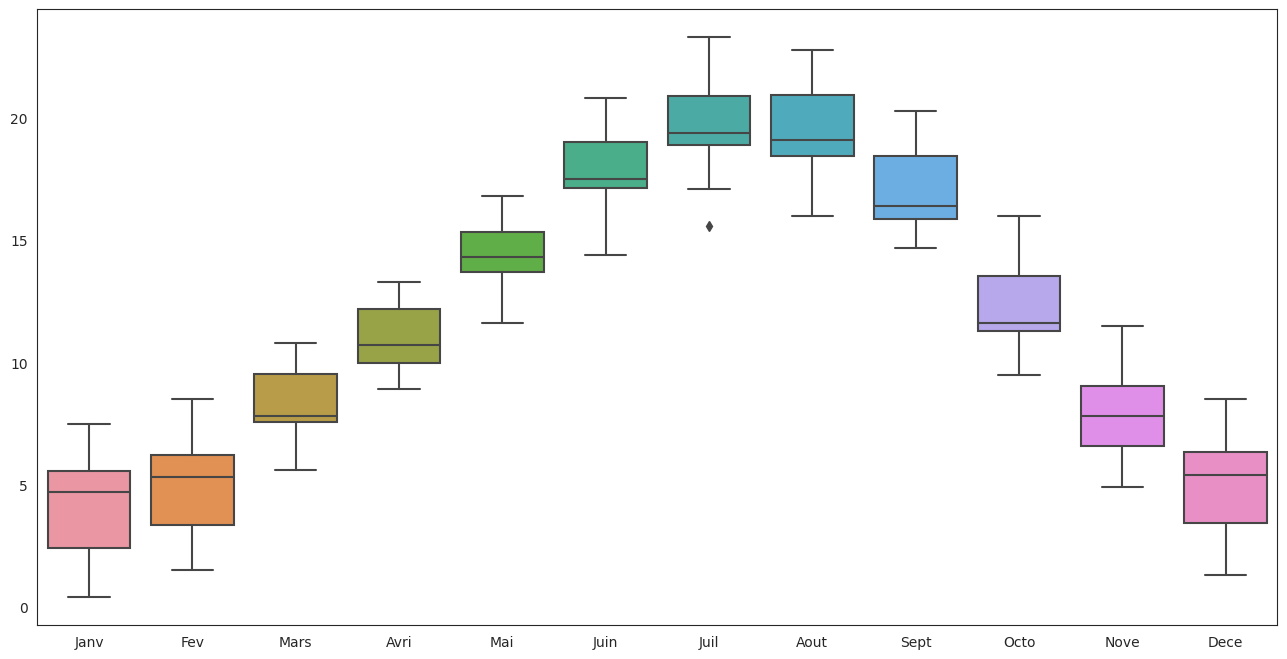

In [5]:
plt.figure(figsize = (16, 8))
sb.boxplot(data = tempn)
plt.show()

Nuages de points 2 à 2 des données sauf les variables latitude, longitude, moyenne et amplitude.

In [6]:
sb.pairplot(data = tempn)

Error in callback <function flush_figures at 0x7f1d449cd6c0> (for post_execute):


KeyboardInterrupt: 

Matrices des corrélation de toutes les variable sauf latitude, longitude, moyenne et amplitude.

In [7]:
tempn.corr().round(3)

,Janv,Fev,Mars,Avri,Mai,Juin,Juil,Aout,Sept,Octo,Nove,Dece
Janv,1.000,0.973,0.835,0.611,0.363,0.339,0.297,0.405,0.604,0.850,0.951,0.994
Fev,0.973,1.000,0.931,0.761,0.547,0.524,0.490,0.588,0.760,0.940,0.986,0.973
Mars,0.835,0.931,1.000,0.920,0.767,0.757,0.722,0.798,0.911,0.968,0.927,0.836
Avri,0.611,0.761,0.920,1.000,0.953,0.942,0.912,0.949,0.978,0.905,0.782,0.625
Mai,0.363,0.547,0.767,0.953,1.000,0.994,0.981,0.980,0.942,0.770,0.591,0.390
Juin,0.339,0.524,0.757,0.942,0.994,1.000,0.992,0.989,0.940,0.757,0.572,0.368
Juil,0.297,0.490,0.722,0.912,0.981,0.992,1.000,0.991,0.933,0.739,0.547,0.332
Aout,0.405,0.588,0.798,0.949,0.980,0.989,0.991,1.000,0.970,0.812,0.637,0.438
Sept,0.604,0.760,0.911,0.978,0.942,0.940,0.933,0.970,1.000,0.926,0.796,0.630
Octo,0.850,0.940,0.968,0.905,0.770,0.757,0.739,0.812,0.926,1.000,0.964,0.871


# Graphiques profil de température

Profil des température des villes de Brest, Lille et Montpellier.

<Axes: xlabel='Mois', ylabel='Températures'>

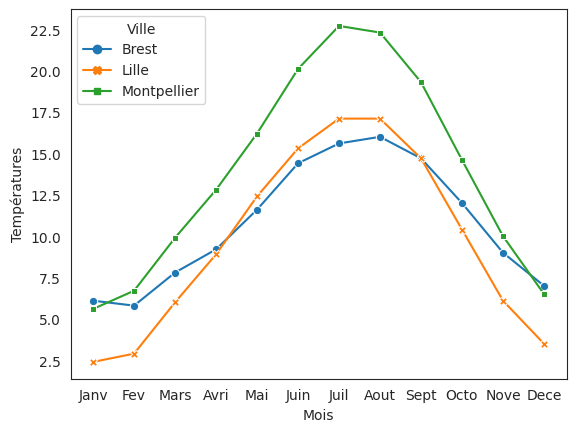

In [8]:
data_profil=temp.query('Ville=="Brest" | Ville=="Lille"| Ville=="Montpellier"')

data_profil=data_profil.melt(id_vars='Ville',
                             value_vars=tempn.columns,var_name='Mois', 
                             value_name='Températures' )
sb.lineplot(data=data_profil,
            x='Mois',y="Températures", 
            hue='Ville', style='Ville',
            markers=True, dashes=False)


# ACP

ACP centrée réduite des données de températures. Les 4 dernières variables seront misent comme variables quantitatives supplémentaires.

In [29]:
n=temp.shape[0]
tempn_cr=scale(tempn)
t_pca=PCA()
t_pca.fit(tempn_cr)

PCA()

: 

In [10]:
# correction dans les valeurs propres car variances d'échantillonage utilisée
eig = pd.DataFrame({
    "Dimension": ["Dim"+str(i+1) for i in range(12)],
    "Valeurs propres": t_pca.explained_variance_*(n-1)/n,
    "% expliquée": t_pca.explained_variance_ratio_* 100,
    "% expliquée cumulée": np.cumsum(t_pca.explained_variance_ratio_) * 100
})
eig.round(2)

,Dimension,Valeurs propres,% expliquée,% expliquée cumulée
0,Dim1,9.59,79.92,79.92
1,Dim2,2.27,18.91,98.82
2,Dim3,0.07,0.59,99.42
3,Dim4,0.04,0.33,99.75
4,Dim5,0.01,0.11,99.86
5,Dim6,0.01,0.06,99.92
6,Dim7,0.01,0.05,99.96
7,Dim8,0.00,0.02,99.98
8,Dim9,0.00,0.01,99.99
9,Dim10,0.00,0.00,100.00


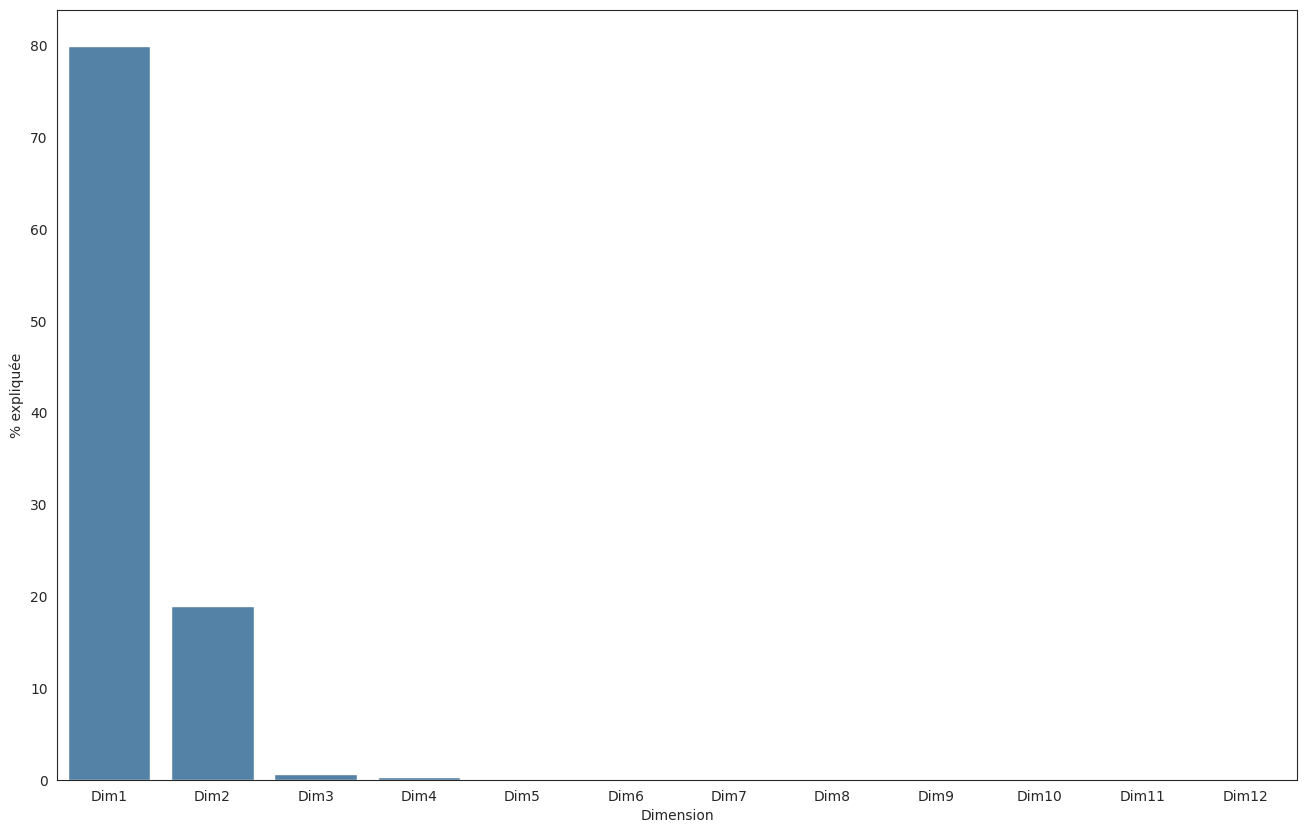

In [11]:
plt.figure(figsize = (16, 10))
sb.barplot(x = "Dimension", y = "% expliquée", data = eig, color = "steelblue")
plt.show()

Coordonnées des individus

In [12]:
coord_ind = t_pca.transform(tempn_cr)
coord_ind_df = pd.DataFrame({
    "Dim1" : coord_ind[:,0], 
    "Dim2" : coord_ind[:,1], 
})
coord_ind_df.index=temp.Ville

# Résultat 
coord_ind_df.round(3)

,Dim1,Dim2
Ville,,
Bordeaux,3.115,0.098
Brest,-2.273,4.082
Clermont,-1.726,-0.591
Grenoble,-1.527,-1.680
Lille,-4.215,0.599
Lyon,-0.834,-1.785
Marseille,4.825,-0.845
Montpellier,4.140,-0.449
Nantes,-0.285,1.108


Contribution individus

In [13]:
# contribution individus poids (n-1) sur les individus au lieu de n
contrib_ind_df=np.square(coord_ind_df).div((n-1)*t_pca.explained_variance_[:2], axis='columns')*100
contrib_ind_df.round(3)

,Dim1,Dim2
Ville,,
Bordeaux,6.743,0.028
Brest,3.593,48.955
Clermont,2.070,1.025
Grenoble,1.621,8.291
Lille,12.353,1.054
Lyon,0.484,9.362
Marseille,16.182,2.100
Montpellier,11.916,0.593
Nantes,0.056,3.607


Graphique des contributions des individus

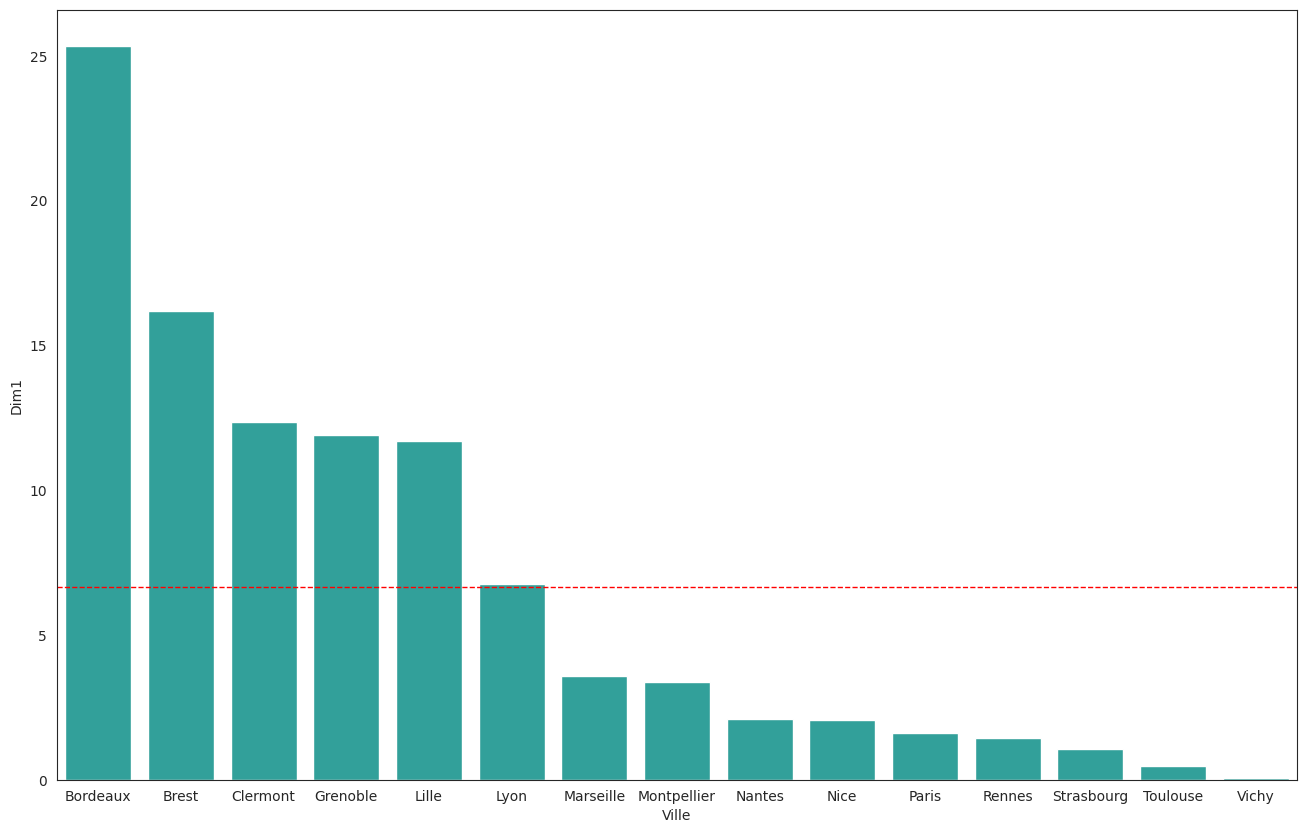

In [14]:
plt.figure(figsize = (16, 10))
sb.barplot(x = contrib_ind_df.index, 
                y = "Dim1",
                palette = ["lightseagreen"],
                data = contrib_ind_df.sort_values(by = "Dim1", ascending = False))
plt.axhline(y = 100/n, color = 'red', linestyle = '--', linewidth = 1)


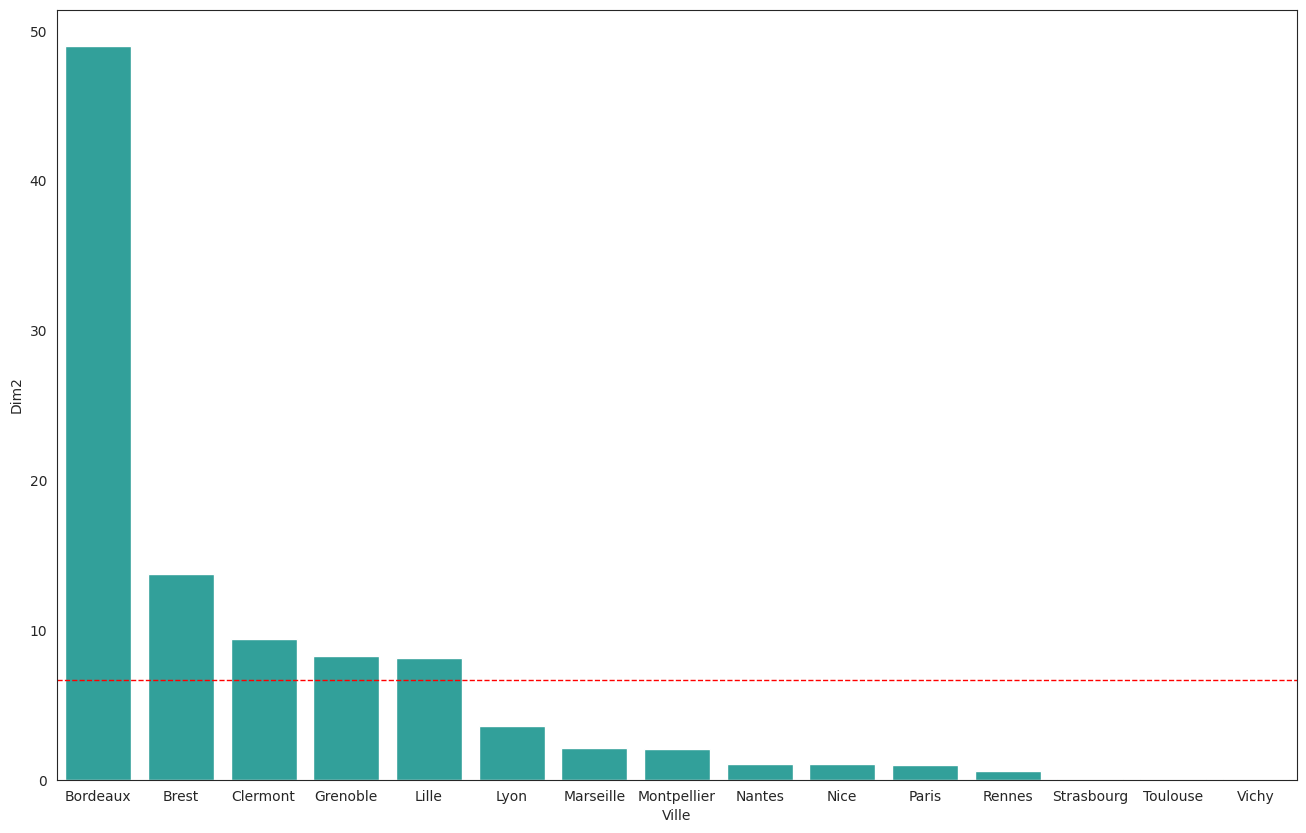

In [15]:
plt.figure(figsize = (16, 10))
sb.barplot(x = contrib_ind_df.index, 
                y = "Dim2",
                palette = ["lightseagreen"],
                data = contrib_ind_df.sort_values(by = "Dim2", ascending = False))
plt.axhline(y = 100/n, color = 'red', linestyle = '--', linewidth = 1)


Qualité de représentation (cos2) individus

In [16]:
# cos2 individus
cos2_ind_df=np.square(coord_ind_df).div(np.square(np.linalg.norm(coord_ind,axis=1)),axis="rows")
cos2_ind_df.round(3)

,Dim1,Dim2
Ville,,
Bordeaux,0.946,0.001
Brest,0.236,0.762
Clermont,0.880,0.103
Grenoble,0.431,0.521
Lille,0.971,0.020
Lyon,0.178,0.817
Marseille,0.964,0.030
Montpellier,0.985,0.012
Nantes,0.058,0.883


Coordonnées des variables actives

In [19]:
# correction (n-1)/n car variance d'échantillonage utilisée
coord_var = t_pca.components_.T*np.sqrt(t_pca.explained_variance_)*(n-1)/n
coord_var_df = pd.DataFrame(coord_var[:,:2], 
                            columns = ["Dim" + str(i+1) for i in range(2)], 
                            index = tempn.columns[:12])
coord_var_df.round(3)

,Dim1,Dim2
Janv,0.735,0.623
Fev,0.851,0.454
Mars,0.936,0.150
Avri,0.936,-0.197
Mai,0.843,-0.458
Juin,0.834,-0.483
Juil,0.813,-0.513
Aout,0.868,-0.415
Sept,0.941,-0.201
Octo,0.947,0.165


Coordonnées variables quantitatives supplémentaires

In [20]:
var_sup_cr=scale(temp[temp.columns[13:]])

# Idem
coord_var_sup = var_sup_cr.T.dot(coord_ind/np.sqrt(t_pca.explained_variance_*(n-1)/n)/n)
coord_var_sup_df = pd.DataFrame(coord_var_sup[:,:2], 
                            columns = ["Dim" + str(i+1) for i in range(2)], 
                            index = temp.columns[13:])
coord_var_sup_df.round(3)

,Dim1,Dim2
Lati,-0.839,0.307
Long,0.173,-0.788
moy,1.000,0.022
amp,0.101,-0.986


Contribution variables

In [21]:
# Idem 
contrib_var_df=np.square(coord_var_df).div(t_pca.explained_variance_[:2]*(n-1)/n, axis='columns')*100
contrib_var_df.round(3)

,Dim1,Dim2
Janv,5.638,17.086
Fev,7.544,9.068
Mars,9.130,0.997
Avri,9.144,1.707
Mai,7.416,9.252
Juin,7.258,10.265
Juil,6.894,11.607
Aout,7.860,7.600
Sept,9.235,1.774
Octo,9.350,1.201


Qualité de représentation (cos2) variable

In [ ]:
# Ici comme c'est une ACP normée les vecteurs variables sont
# de longueur 1, donc le cos2 est leur coordonnée au carré 
cos2_var_df=np.square(coord_var_df)
cos2_var_df.round(3)                                       

In [ ]:
# cos2 variables sup
cos2_var_sup_df=np.square(coord_var_sup_df)
cos2_var_sup_df.round(3)                                       

Variables plan 1-2

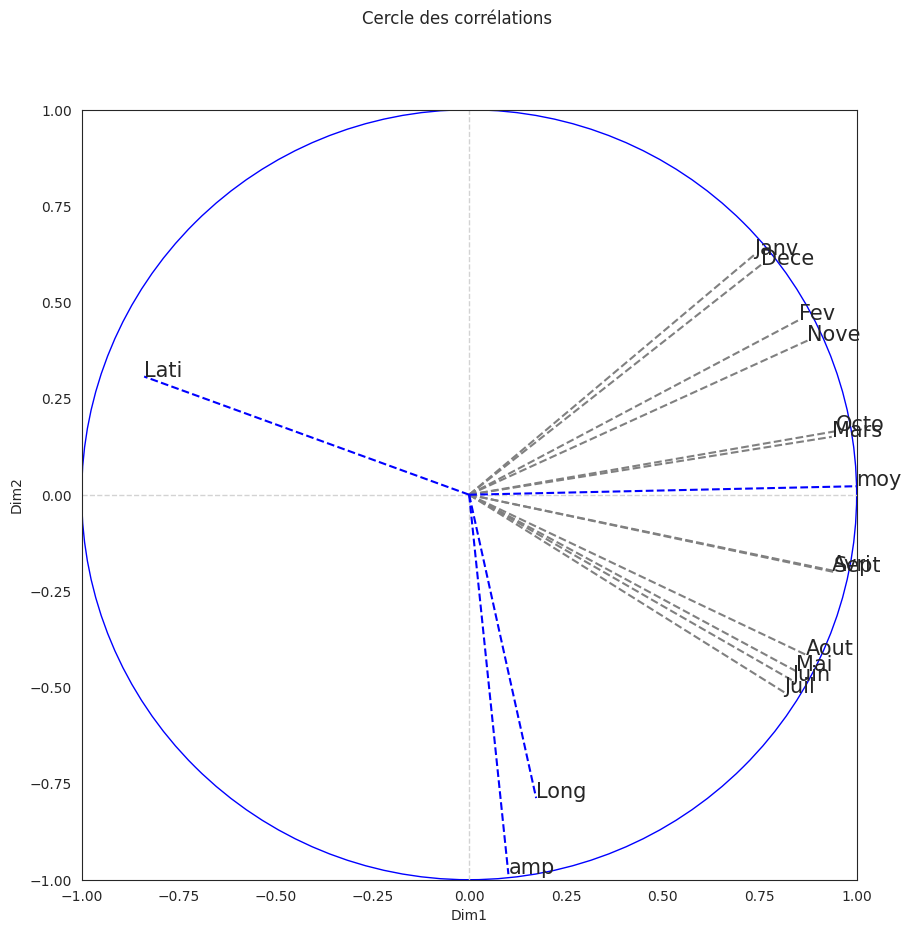

In [22]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.set_xlabel("Dim1")
axes.set_ylabel("Dim2")
for j in range(12):
    axes.text(coord_var_df["Dim1"][j],coord_var_df["Dim2"][j], coord_var_df.index[j], size = 15)
    axes.plot([0,coord_var_df["Dim1"][j]], [0,coord_var_df["Dim2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
for j in range(4):
    axes.text(coord_var_sup_df["Dim1"][j],coord_var_sup_df["Dim2"][j], coord_var_sup_df.index[j], size = 15)
    axes.plot([0,coord_var_sup_df["Dim1"][j]], [0,coord_var_sup_df["Dim2"][j]], color = "blue", linestyle = 'dashed')

plt.show()

Individus plan 1-2

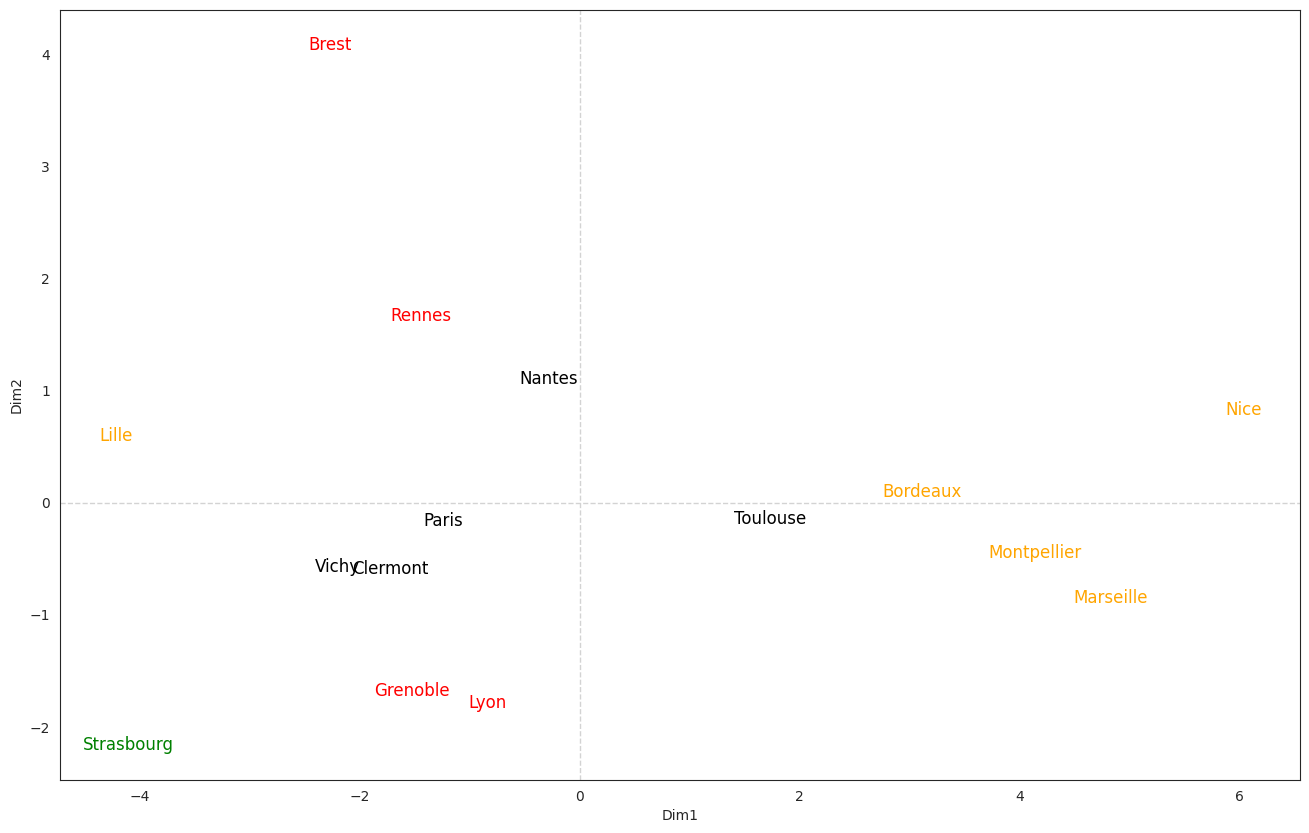

In [23]:
plt.figure(figsize = (16, 10))
sb.scatterplot(x = "Dim1", y = "Dim2", data =coord_ind_df , color = "gray", alpha = 0)

for i in range(coord_ind_df.shape[0]):
    C='black'
    if (contrib_ind_df.iloc[i][0] > 100/n):
        C='Orange'
    if (contrib_ind_df.iloc[i][1] > 100/n):
        C = 'Red'
    if ((contrib_ind_df.iloc[i][1] > 100/n) and (contrib_ind_df.iloc[i][0] > 100/n)):
        C = 'Green'
    plt.text(coord_ind_df.iloc[i][0], coord_ind_df.iloc[i][1], coord_ind_df.index[i], 
             ha = "center", va = "center", fontsize=12,  color=C)
plt.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
plt.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
